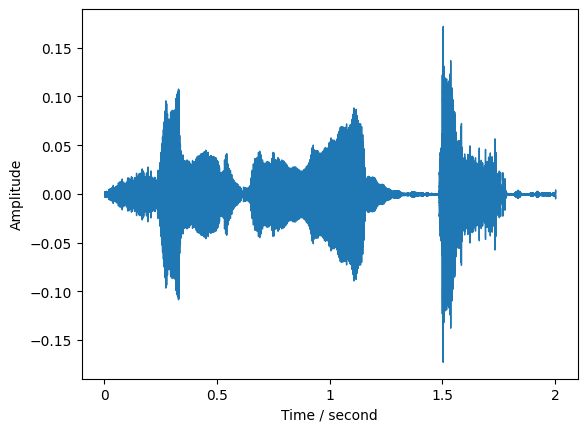

In [31]:
# read audio files
import librosa
import numpy as np
import matplotlib.pyplot as plt

signal, sample_rate = librosa.load('./audio_happy.wav')

# plot audio files in time domain
plt.figure(1)
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()


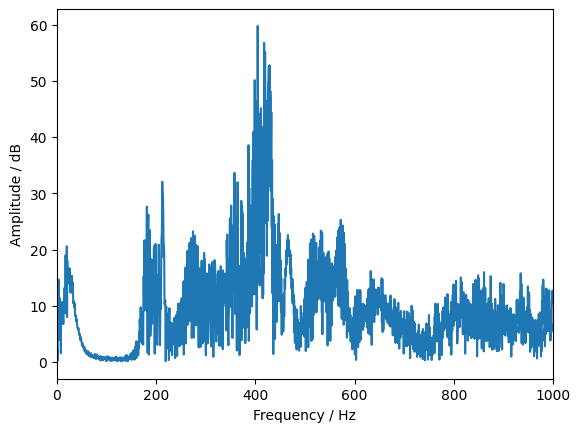

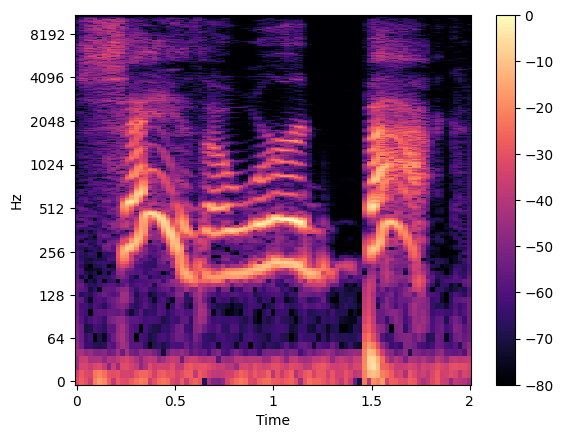

In [32]:
# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

# plot the time-frequency variation of the audio
D = librosa.stft(signal)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(3)
librosa.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()



[0.00063576 0.0014256  0.00203801 0.00253555 0.00315263 0.00374239
 0.00412314 0.00456212 0.00457832 0.00444372 0.00776313 0.01696999
 0.02174833 0.02162135 0.02150921 0.01486087 0.01223129 0.01269171
 0.01484611 0.01637091 0.01597098 0.01430695 0.0108642  0.00972464
 0.00786331 0.0046813  0.002654   0.00245979 0.00537746 0.00840283
 0.00912979 0.00859932 0.00909784 0.00940032 0.00956948 0.00841552
 0.00773392 0.0075403  0.00798442 0.01153079 0.01501489 0.01551053
 0.01592496 0.01649874 0.01761313 0.01918444 0.02042352 0.02178805
 0.0233889  0.02116785 0.0114789  0.00593695 0.00489412 0.0034689
 0.00241081 0.0015805  0.00123812 0.00071506 0.00059284 0.00083699
 0.00063768 0.00052359 0.00047465 0.00395342 0.01935121 0.02929232
 0.02782187 0.02095892 0.01550901 0.01169846 0.00994797 0.0090523
 0.00919339 0.00958167 0.00939442 0.00709096 0.00339159 0.00145195
 0.00058522 0.00091929 0.00052462 0.00043182 0.00064751 0.00067555
 0.00053935 0.00058816 0.00049083]
   Loudness
0  0.000636
1  0.

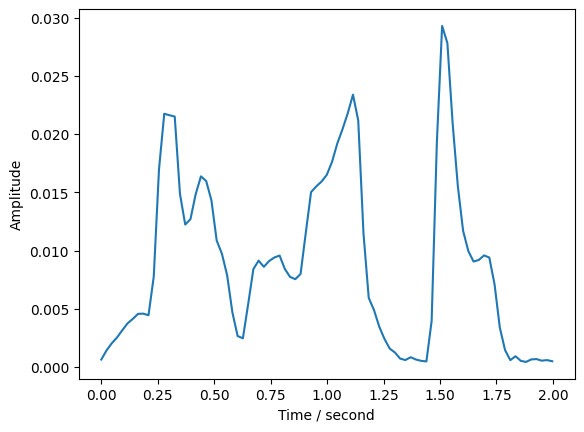

In [33]:

# audio feature extraction: loudness
import pandas as pd

df_loudness = pd.DataFrame()
S, phase = librosa.magphase(librosa.stft(signal))
rms = librosa.feature.rms(S=S)
print(rms[0])
df_loudness['Loudness'] = rms[0]
print(df_loudness.head(5))
print(len(df_loudness))
plt.figure(4)
times = librosa.times_like(rms)
plt.plot(times, rms[0])
plt.xlabel("Time / second")
plt.ylabel("Amplitude")
plt.show()


       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -543.417664 -487.927307 -462.431091 -450.325684 -436.167328 -422.046936   
1  -10.929953  -42.948753  -65.994812  -77.799362  -78.761429  -77.083435   
2   34.802727   31.962296   30.264172   25.911896   23.591274   22.922405   
3   42.172367   27.622890   13.269439    2.232629    0.330128    2.746867   
4   -2.084471  -13.006627  -18.912136  -19.949638  -13.008187   -7.861201   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -398.078400 -373.792084 -369.024353 -341.530029 -314.731079 -311.417297  
1  -68.291092  -61.709557  -61.411095  -27.866213   24.168594   78.297668  
2   23.563700   20.122643   16.960035   31.928185   36.962181    5.978168  
3   -0.107542   -5.893594   -6.256651    8.758387   11.938786   -7.881699  
4  -14.125580  -17.870319  -12.700502   -2.071247   -0.838994    3.373720  
12
[-543.41766 -487.9273  -462.4311  -450.32568 -436.16733 -422.04694
 -398.0784 

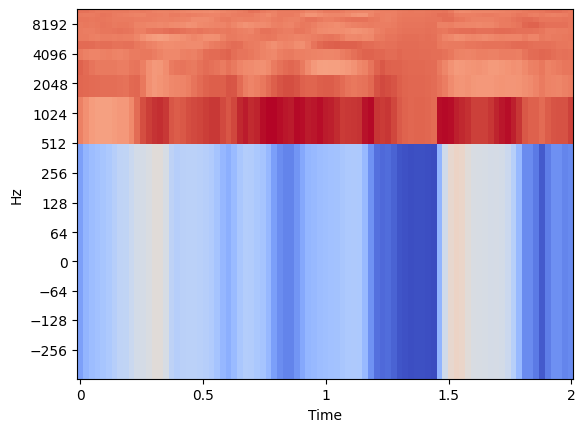

In [34]:

# audio feature extraction: mel-frequency cepstral coefficients
df_mfccs = pd.DataFrame()
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
for n_mfcc in range(len(mfccs)):
    df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
print(df_mfccs.head(5))
print(len(df_mfccs))
print(mfccs[0])
plt.figure(5)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

        ZCR
0  0.168457
1  0.309082
2  0.457031
3  0.484863
4  0.509766


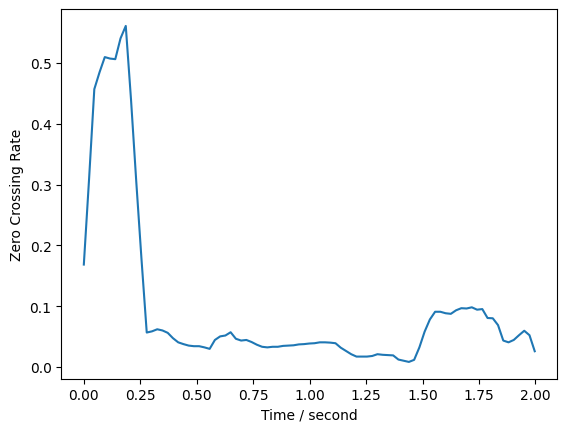

In [35]:
# audio feature extraction: zero crossing rate
df_zero_crossing_rate = pd.DataFrame()
zcr = librosa.feature.zero_crossing_rate(y=signal)
df_zero_crossing_rate['ZCR'] = zcr[0]
print(df_zero_crossing_rate.head(5))
plt.figure(6)
times = librosa.times_like(zcr)
plt.plot(times, zcr[0])
plt.xlabel("Time / second")
plt.ylabel("Zero Crossing Rate")
plt.show()

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  \
0  0.997895  0.818582  0.620639  0.373221  0.361151  0.388662  0.265388   
1  0.575913  0.613947  0.541263  0.389133  0.480563  0.503572  0.304022   
2  0.303929  0.378356  0.341436  0.377294  0.505848  0.557829  0.303928   
3  0.244704  0.358211  0.392895  0.368756  0.437561  0.638592  0.345535   
4  0.378593  0.600810  0.591823  0.513324  0.647899  0.757564  0.369648   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.254488  0.280182   0.439671   1.000000   0.784563  
1  0.316069  0.316199   0.362399   0.378475   1.000000  
2  0.317301  0.413802   0.410846   0.064318   0.173685  
3  0.214920  0.249370   0.287866   0.019765   0.007028  
4  0.200052  0.212292   0.271281   0.018044   0.005966  


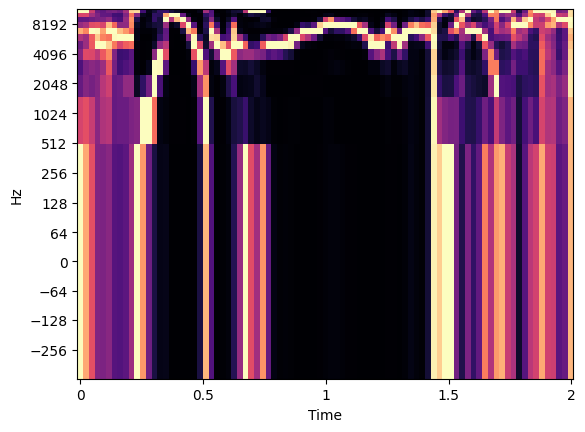

In [36]:
# audio feature extraction: chroma
df_chroma = pd.DataFrame()
chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
for n_chroma in range(len(chromagram)):
    df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
print(df_chroma.head(5))
plt.figure(7)
librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

   Mel_Spectrogram_1  Mel_Spectrogram_2  Mel_Spectrogram_3  Mel_Spectrogram_4  \
0           0.000123           0.000281           0.000199           0.000103   
1           0.000024           0.000040           0.000044           0.000031   
2           0.000006           0.000013           0.000018           0.000031   
3           0.000004           0.000014           0.000030           0.000030   
4           0.000006           0.000015           0.000025           0.000030   

   Mel_Spectrogram_5  Mel_Spectrogram_6  Mel_Spectrogram_7  Mel_Spectrogram_8  \
0           0.000468           0.000821           0.000410           0.000201   
1           0.000025           0.000033           0.000093           0.000161   
2           0.000043           0.000041           0.000091           0.000209   
3           0.000049           0.000058           0.000213           0.000573   
4           0.000044           0.000068           0.000110           0.000215   

   Mel_Spectrogram_9  Mel_

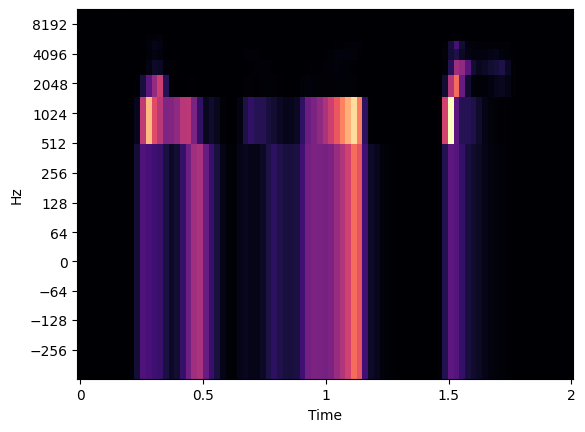

In [37]:
# audio feature extraction: mel spectrogram
df_mel_spectrogram = pd.DataFrame()
mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
for n_mel in range(len(mel_spectrogram)):
    df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
print(df_mel_spectrogram.head(5))
plt.figure(8)
librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()


In [40]:
# combine all features
feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
print(feature_matrix)
feature_matrix.to_csv('feature_matrix.csv')

    Loudness      MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5  \
0   0.000636 -543.417664 -487.927307 -462.431091 -450.325684 -436.167328   
1   0.001426  -10.929953  -42.948753  -65.994812  -77.799362  -78.761429   
2   0.002038   34.802727   31.962296   30.264172   25.911896   23.591274   
3   0.002536   42.172367   27.622890   13.269439    2.232629    0.330128   
4   0.003153   -2.084471  -13.006627  -18.912136  -19.949638  -13.008187   
..       ...         ...         ...         ...         ...         ...   
82  0.000648         NaN         NaN         NaN         NaN         NaN   
83  0.000676         NaN         NaN         NaN         NaN         NaN   
84  0.000539         NaN         NaN         NaN         NaN         NaN   
85  0.000588         NaN         NaN         NaN         NaN         NaN   
86  0.000491         NaN         NaN         NaN         NaN         NaN   

        MFCC_6      MFCC_7      MFCC_8      MFCC_9  ...  Mel_Spectrogram_3  \
0  -422.0